# **Note** : **"This notebook runs the full 6-step Scikit-Learn workflow on heart-disease.csv as an overview. For detailed explanations and step-by-step code, see each workflow stage in its respective file.."**

# A Quick Scikit-Learn Tutorial with Understanding its Workflow

## What is Scikit-Learn (sklearn)?

[Scikit-Learn](https://scikit-learn.org/stable/index.html), also referred to as `sklearn`, is an open-source Python machine learning library.

It's built on top on NumPy (Python library for numerical computing) and Matplotlib (Python library for data visualization).

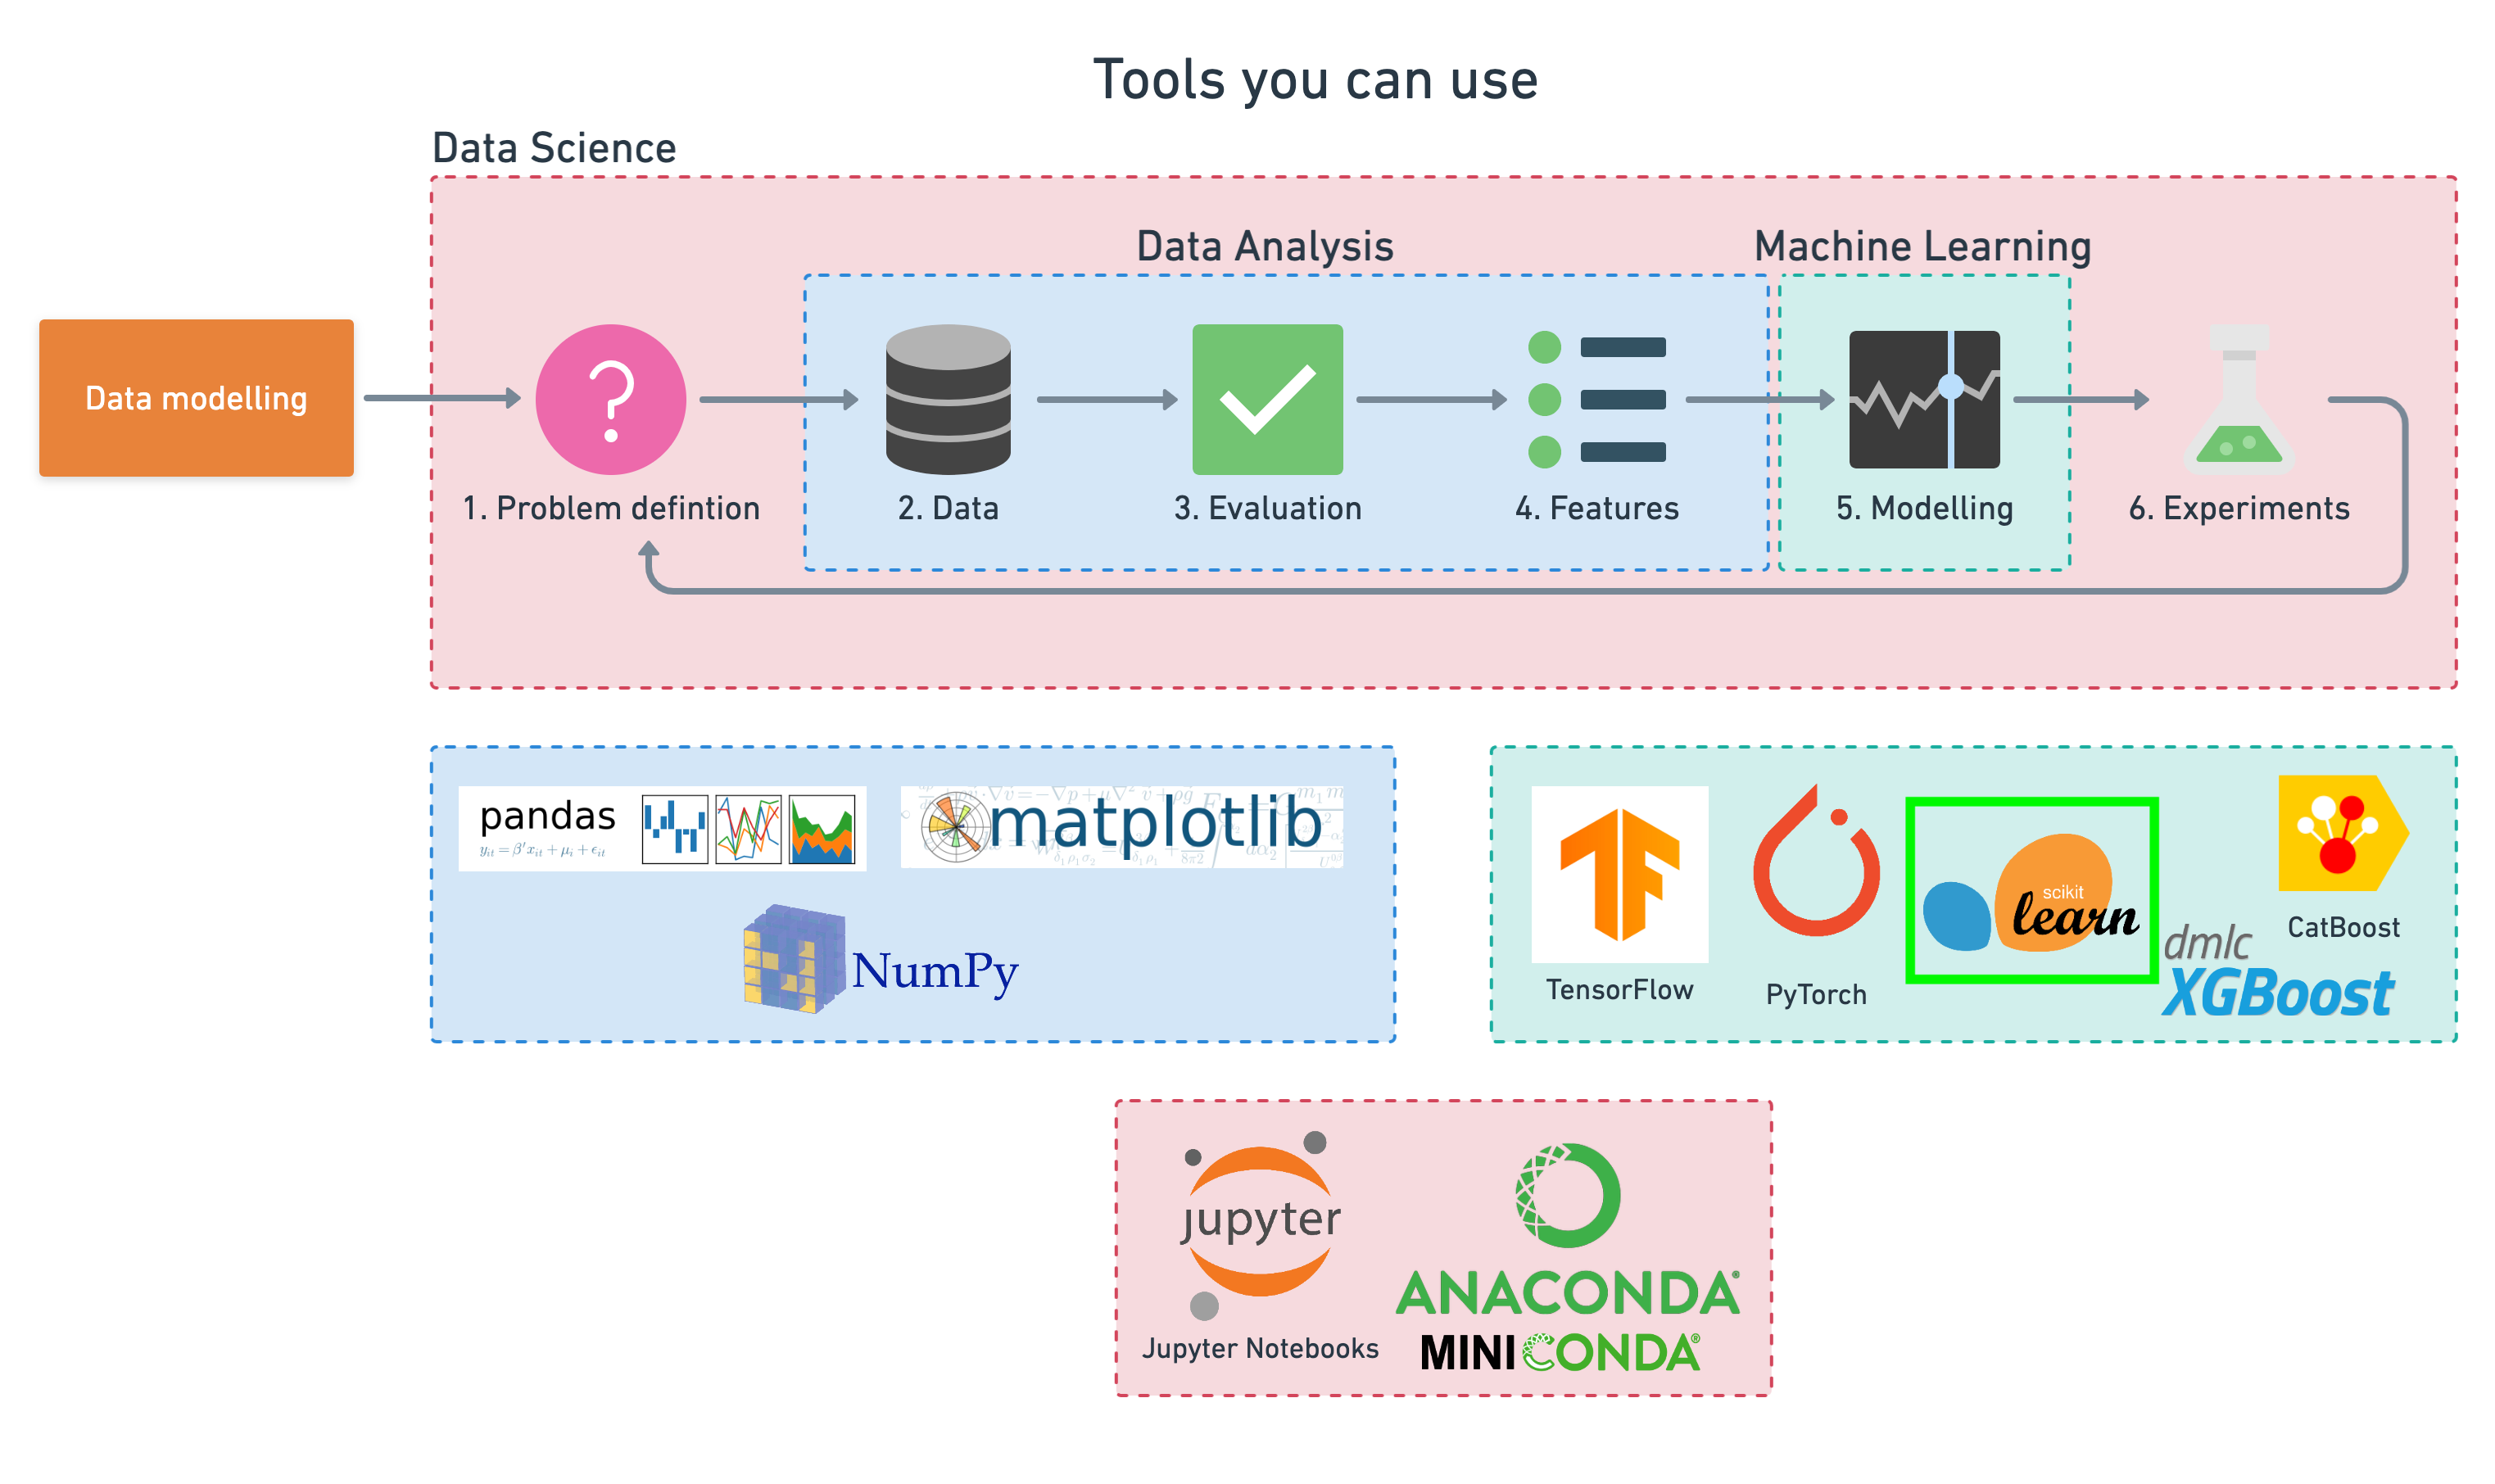

## What does this notebook cover?

This repo runs the full 6-step ML workflow on heart-disease.csv, giving you an overview (or trailer) of the entire process in one place. For deeper explanations and clean, detailed code for each step of the workflow, check out the respective files for each workflow stage in this repo.

More specifically, we'll cover:

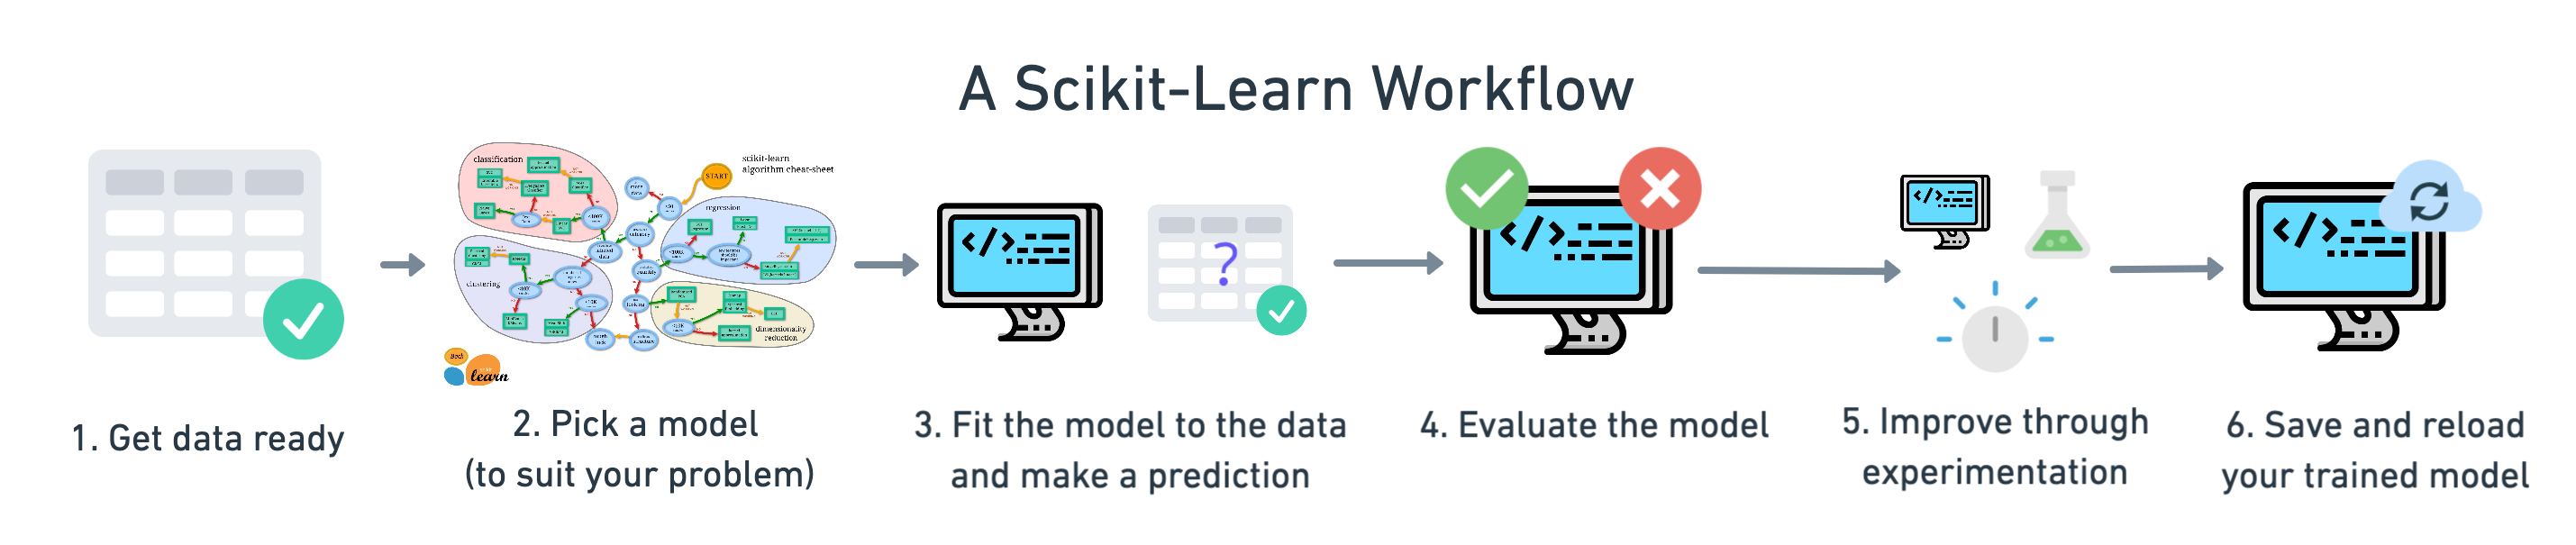

0. An end-to-end Scikit-Learn worfklow
1. Getting the data ready
2. Choosing the right maching learning estimator/aglorithm/model for your problem
3. Fitting your chosen machine learning model to data and using it to make a prediction
4. Evaluting a machine learning model
5. Improving predictions through experimentation (hyperparameter tuning)
6. Saving and loading a pretrained model



## 0. An end-to-end Scikit-Learn workflow

Before we get in-depth, let's quickly check out what an end-to-end Scikit-Learn workflow might look like.

Once we've seen an end-to-end workflow, we'll dive into each step a little deeper

Specifically, we'll get hands-on with the following steps:
1. Getting data ready (split into features and labels, prepare train and test steps)
2. Choosing a model for our problem
3. Fit the model to the data and use it to make a prediction
4. Evaluate the model
5. Experiment to improve
6. Save a model for someone else to use

## Step 1. Get the Data Ready

### Random Forest Classifier Workflow for Classifying Heart Disease

As an example dataset, we'll import `heart-disease.csv`.

In [1]:
import pandas as pd

heart_disease = pd.read_csv("data/heart-disease.csv") # load data from directory
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Here, each row is a different patient and all columns except `target` are different patient characteristics.

The `target` column indicates whether the patient has heart disease (`target=1`) or not (`target=0`), this is our "label" columnm, the variable we're going to try and predict.

The rest of the columns (often called features) are what we'll be using to predict the `target` value.

> **Note:** It's a common custom to save features to a varialbe `X` and labels to a variable `y`. In practice, we'd like to use the `X` (features) to build a predictive algorithm to predict the `y` (labels).

In [2]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target column)
y = heart_disease["target"]

# Check the head of the features DataFrame
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [3]:
# Check the head and the value counts of the labels
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 target
 1    165
 0    138
 Name: count, dtype: int64)

One of the most important practices in machine learning is to split datasets into training and test sets.

As in, a model will **train on the training set** to learn patterns and then those patterns can be **evaluated on the test set**.

Crucially, a model should **never** see testing data during training.

This is equivalent to a student studying course materials during the semester (training set) and then testing their abilities on the following exam (testing set).

Scikit-learn provides the [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method to split datasets in training and test sets.

> **Note:** A common practice to use an 80/20 or 70/30 or 75/25 split for training/testing data. There is also a third set, known as a validation set (e.g. 70/15/15 for training/validation/test) for hyperparamter tuning on but for now we'll focus on training and test sets.

In [4]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25) # by default train_test_split uses 25% of the data for the test set

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

## 2. Choose the model and hyperparameters

Choosing a model often depends on the type of problem you're working on.

For example, there are different models that Scikit-Learn recommends whether you're working on a classification or regression problem.

Scikit-Learn refers to models as "estimators", however, they are often also referred to as `model` or `clf` (short for classifier).

A model's hyperparameters are settings you can change to adjust it for your problem, much like knobs on an oven you can tune to cook your favourite dish.

In [6]:
# Since we're working on a classification problem, we'll start with a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [7]:
# View the current hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3. Fit the model to the data and use it to make a prediction

Fitting a model a dataset involves passing it the data and asking it to figure out the patterns.

If there are labels (supervised learning), the model tries to work out the relationship between the data and the labels.

If there are no labels (unsupervised learning), the model tries to find patterns and group similar samples together.

In our case, we start by fitting a model on the training split (`X_train`, `y_train`).

In [9]:
clf.fit(X=X_train, y=y_train)

RandomForestClassifier()

In [10]:
# Use the model to make a prediction on the test data (further evaluation)
# In order to predict a label, data has to be in the same shape as X_train

y_preds = clf.predict(X=X_test)

## 4. Evaluate the model

Now we've made some predictions, we can start to use some more Scikit-Learn methods to figure out how good our model is.

Each model or estimator has a built-in [`score()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.score) method.

This method compares how well the model was able to learn the patterns between the features and labels.

The `score()` method for each model uses a standard evaluation metric to measure your model's results.

In the case of a classifier (our model), one of the most common evaluation metrics is [accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score) (the fraction of correct predictions out of total predictions).

Let's check out our model's accuracy on the training set.

In [11]:
# Evaluate the model on the training set
train_acc = clf.score(X=X_train, y=y_train)
print(f"The model's accuracy on the training dataset is: {train_acc*100}%")
# This is because it has a chance to see both data and labels.

The model's accuracy on the training dataset is: 100.0%


In [12]:
# Evaluate the model on the test set
test_acc = clf.score(X=X_test, y=y_test)
print(f"The model's accuracy on the testing dataset is: {test_acc*100:.2f}%")

The model's accuracy on the testing dataset is: 78.95%


This is quite often the case, because remember, a model has never seen the testing examples before.

There are also a number of other evaluation methods we can use for our classification models.

All of the following classification metrics come from the [`sklearn.metrics`](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) module:
* [`classification_report(y_true, y_true)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) - Builds a text report showing various classification metrics such as [precision, recall](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html) and F1-score.
* [`confusion_matrix(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) - Create a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) to compare predictions to truth labels.
* [`accuracy_score(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) - Find the accuracy score (the default metric) for a classifier.

All metrics have the following in common: they compare a model's predictions (`y_pred`) to truth labels (`y_true`).

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        34
           1       0.80      0.83      0.81        42

    accuracy                           0.79        76
   macro avg       0.79      0.78      0.79        76
weighted avg       0.79      0.79      0.79        76



In [14]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[25,  9],
       [ 7, 35]])

In [15]:
# Compute the accuracy score (same as the score() method for classifiers)
accuracy_score(y_test, y_preds)

0.7894736842105263

## 5. Experiment to improve

The first model you build is often referred to as a baseline (a baseline is often even simpler than the model we've used, a baseline could be "let's just by default predict the most common value and then try to improve").

Once you've got a baseline model, like we have here, it's important to remember, this is often not the final model you'll use.

The next step in the workflow is to try and improve upon your baseline model.

How?

With one of the most important mottos in machine learning...

*Experiment, experiment, experiment!*

Experiments can come in many different forms.

But let's break it into two.

1. From a model perspective.
2. From a data perspective.

From a model perspective may involve things such as using a more complex model or tuning your models hyperparameters.

From a data perspective may involve collecting more data or better quality data so your existing model has more of a chance to learn the patterns within.

If you're already working on an existing dataset, it's often easier try a series of model perspective experiments first and then turn to data perspective experiments if you aren't getting the results you're looking for.

One thing you should be aware of is if you're tuning a models hyperparameters in a series of experiments, your reuslts should always be cross-validated (we'll see this later on!).

[Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html) is a way of making sure the results you're getting are consistent across your training and test datasets (because it uses multiple versions of training and test sets) rather than just luck because of the order the original training and test sets were created.

* Try different hyperparameters.
* All different parameters should be cross-validated.
    * **Note:** Beware of cross-validation for time series problems (as for time series, you don't want to mix samples from the future with samples from the past).
    
Different models you use will have different hyperparameters you can tune.

For the case of our model, the [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), we'll start trying different values for `n_estimators` (a measure for the number of trees in the random forest).

By default, `n_estimators=100`, so how about we try values from `100` to `200` and see what happens (generally more is better)?

In [18]:
# Try different numbers of estimators (trees)... (no cross-validation)
np.random.seed(42)
for i in range(100, 200, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 100 estimators...
Model accuracy on test set: 82.89%

Trying model with 110 estimators...
Model accuracy on test set: 80.26%

Trying model with 120 estimators...
Model accuracy on test set: 76.32%

Trying model with 130 estimators...
Model accuracy on test set: 81.58%

Trying model with 140 estimators...
Model accuracy on test set: 80.26%

Trying model with 150 estimators...
Model accuracy on test set: 78.95%

Trying model with 160 estimators...
Model accuracy on test set: 80.26%

Trying model with 170 estimators...
Model accuracy on test set: 82.89%

Trying model with 180 estimators...
Model accuracy on test set: 81.58%

Trying model with 190 estimators...
Model accuracy on test set: 81.58%



The metrics above were measured on a single train and test split.

Let's use [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to measure the results across 5 different train and test sets.

We can achieve this by setting `cross_val_score(X, y, cv=5)`.

Where `X` is the *full* feature set and `y` is the *full* label set and `cv` is the number of train and test splits `cross_val_score` will automatically create from the data (in our case, `5` different splits, this is known as 5-fold cross-validation).

In [19]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(100, 200, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)

    # Measure the model score on a single train/test split
    model_score = model.score(X_test, y_test)
    print(f"Model accuracy on single test set split: {model_score * 100:.2f}%")

    # Measure the mean cross-validation score across 5 different train and test splits
    cross_val_mean = np.mean(cross_val_score(model, X, y, cv=5))
    print(f"5-fold cross-validation score: {cross_val_mean * 100:.2f}%")

    print("")

Trying model with 100 estimators...
Model accuracy on single test set split: 82.89%
5-fold cross-validation score: 82.15%

Trying model with 110 estimators...
Model accuracy on single test set split: 76.32%
5-fold cross-validation score: 81.17%

Trying model with 120 estimators...
Model accuracy on single test set split: 80.26%
5-fold cross-validation score: 83.16%

Trying model with 130 estimators...
Model accuracy on single test set split: 80.26%
5-fold cross-validation score: 83.14%

Trying model with 140 estimators...
Model accuracy on single test set split: 82.89%
5-fold cross-validation score: 82.48%

Trying model with 150 estimators...
Model accuracy on single test set split: 81.58%
5-fold cross-validation score: 80.17%

Trying model with 160 estimators...
Model accuracy on single test set split: 80.26%
5-fold cross-validation score: 80.83%

Trying model with 170 estimators...
Model accuracy on single test set split: 81.58%
5-fold cross-validation score: 81.83%

Trying model wit

Which model had the best cross-validation score?

This is usually a better indicator of a quality model than a single split accuracy score.

Rather than set up and track the results of these experiments manually, we can get Scikit-Learn to do the exploration for us.

Scikit-Learn's [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is a way to search over a set of different hyperparameter values and automatically track which perform the best.

Let's test it!

In [20]:
# Another way to do it with GridSearchCV...
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over in dictionary form
# (these can be any of your target model's hyperparameters)
param_grid = {'n_estimators': [i for i in range(100, 200, 10)]}

# Setup the grid search
grid = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=param_grid,
                    cv=5,
                    verbose=1)

# Fit the grid search to the data
grid.fit(X, y)

# Find the best parameters
print(f"The best parameter values are: {grid.best_params_}")
print(f"With a score of: {grid.best_score_*100:.2f}%")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameter values are: {'n_estimators': 120}
With a score of: 82.82%


We can extract the best model/estimator with the `best_estimator_` attribute.

In [21]:
# Set the model to be the best estimator
clf = grid.best_estimator_
clf

RandomForestClassifier(n_estimators=120)

In [22]:
# Fit the best model
clf = clf.fit(X_train, y_train)

# Find the best model scores on our single test split
# (note: this may be lower than the cross-validation score since it's only on one split of the data)
print(f"Best model score on single split of the data: {clf.score(X_test, y_test)*100:.2f}%")

Best model score on single split of the data: 78.95%


## 6. Save a model

When you've done a few experiments and you're happy with how your model is doing, you'll likely want someone else to be able to use it.

This may come in the form of a teammate or colleague trying to replicate and validate your results or through a customer using your model as part of a service or application you offer.

Saving a model also allows you to reuse it later without having to go through retraining it. Which is helpful, especially when your training times start to increase.

You can [save a Scikit-Learn model](https://scikit-learn.org/stable/model_persistence.html) using Python's in-built [`pickle` module](https://docs.python.org/3/library/pickle.html).

In [23]:
import pickle

# Save an existing model to file
pickle.dump(model, open("random_forest_model_1.pkl", "wb"))

In [24]:
# Load a saved pickle model and evaluate it
loaded_pickle_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
print(f"Loaded pickle model prediction score: {loaded_pickle_model.score(X_test, y_test) * 100:.2f}%")

Loaded pickle model prediction score: 76.32%


For larger models, it may be more efficient to use [Joblib](https://joblib.readthedocs.io/en/stable/).

In [27]:
from joblib import dump, load

# Save a model using joblib
dump(model, "random_forest_model_11.joblib")

['random_forest_model_11.joblib']

In [28]:
# Load a saved joblib model and evaluate it
loaded_joblib_model = load("random_forest_model_11.joblib")
print(f"Loaded joblib model prediction score: {loaded_joblib_model.score(X_test, y_test) * 100:.2f}%")

Loaded joblib model prediction score: 76.32%
